<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Perfume Recommendation with Sentence-BERT**


Estimated time needed: **45** minutes


A fragrance retailer recently wants to boost its online sales by deploying a recommender system on its website. You are a Data Scientist working for the company and you are asked to design this system where a customer will be recommended 6 perfumes that have similar notes to his/her most recent perfume searched. What you have in hand is a text file that contains the notes of all the perfumes that the retailer carries from its primary perfumer. It's time to start building the perfume recommendation system!

In this guided project, you will first learn about Sentence-BERT for transforming the notes of the perfumes into semantically meaningful sentence embeddings that can be compared in terms of similarity metrics such as the cosine-similarity. Then you will use the embeddings to build a recommender system that outputs similar types of perfumes, as per the requirements of your manager at the fragrance retail company! 


<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX068IEN/images/IMG_9448.jpeg" width="60%"><center>


<p style="color:gray; text-align:center;">Image credits to <a href="https://www.keepitrepatation.xyz/products.aspx?cname=all+tom+ford+fragrances&cid=137">this e-commerce website</a></p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>   
    <li><a href="#Background on Sentence-BERT">Background on Sentence-BERT</a></li>
    <li><a href="#SBERT for Sentence Embedding">SBERT for Sentence Embedding</a></li>
    <li><a href="#SBERT for Analyzing Semantic Textual Similarity (STS)"> SBERT for Analyzing Semantic Textual Similarity (STS)</a></li>
    <li><a href="#Use Case of SBERT Embeddings - Perfume Recommendation"> Use Case of SBERT Embeddings - Perfume Recommendation</a>  
        <ol>
            <li><a href="#Preparing the Dataset">Preparing the Dataset</a></li>
            <li><a href="#Creating Perfume Notes Embeddings">Creating Perfume Notes Embeddings</a></li>
            <li><a href="#Recommending Perfumes using Cosine Similarity">Recommending Perfumes using Cosine Similarity</a></li>            
        </ol>
    </li>  
    <li><a href="#Exercise: Getting Your Own Perfume Suggestions">Exercise: Getting Your Own Perfume Suggestions</a>  
        <ol>
            <li><a href="#Exercise 1: Create perfume embeddings">Exercise 1: Create perfume embeddings</a></li>
            <li><a href="#Exercise 2: Produce cosine similarity scores">Exercise 2: Produce cosine similarity scores</a></li>
            <li><a href="#Exercise 3: Sort the perfume similarity scores">Exercise 3: Sort the perfume similarity scores</a></li>            
        </ol>
    </li>  
    <li><a href="#Background on BERT (optional)">Background on BERT (optional)</a>  
        <ol>
            <li><a href="#What is BERT?">What is BERT?</a></li>
            <li><a href="#What does BERT do?">What does BERT do?</a></li>
            <li><a href="#How does BERT work?">How does BERT work?</a></li>            
        </ol>
    </li>
</ol>


## Objectives

After completing this lab you will be able to:

- **Describe** the working mechanics of Sentence-BERT.
- **Compute** sentence embeddings using Python's sentence-transformers framework.
- **Perform** Semantic Textual Similarity (STS) analysis on sentence embeddings.
- **Build** a perfume recommender system.


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

The `sentence-transformers` library is __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install it for computing sentence embeddings in this project.


In [1]:
!pip install -U sentence-transformers
!pip install scikit-learn==0.23.1  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 42.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.2/890.2 MB 457.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 685.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 979.8 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 8.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.1/757.1 kB 35.5 MB/s eta 0:00:00
     ━━━━━

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from sentence_transformers import util


import skillsnetwork

sns.set_context('notebook')
sns.set_style('white')

### Defining Helper Functions


In [4]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plotter(x, y, title):
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

## Background on Sentence-BERT


Sentence-BERT is a modification of the BERT framework for enabling **large-scale semantic similarity comparison, clustering, and information retrieval.** 

<p style="color:blue">If you don't know what BERT is or need a memory refresh, please scroll down to section: Background on BERT (optional).</p>


Sentence-BERT, or **SBERT**, uses siamese and triplet network structures to derive semantically meaningful sentence embeddings that can be compared using cosine-similarity. A siamese network consists of two or more identical subnetworks, where the two subnetworks share the same weights. Weights updating is mirrored across the subnetworks during training. The following is a diagram of the SBERT architecture with classification objective function:

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX068IEN/images/SBERT.png" width="40%"></center>

<p style="color:gray; text-align:center;">Image credits to <a href="https://arxiv.org/abs/1908.10084?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01">Nils Reimers and Iryna Gurevych</a></p>


It's apparent that SBERT uses two "twin" BERT models and adds a pooling operation to the outputs of the two BERT models. The pooling layers create the fixed-size sentence embeddings for the input sentences.

Sentence embeddings are a well-studied area with dozens of proposed methods. Previous sentence embedding methods such as InferSent and Universal Sentence Encoder train from random initializations. The authors of [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01) uses the pre-trained BERT and RoBERTa network and fine-tunes it to yield sentence embeddings, which significantly reduced the training time (SBERT can be tuned in less than 20 mins) while yielding better results than comparable sentence embedding methods.


## SBERT for Sentence Embedding


SBERT has a Python library called [sentence_transformers](https://www.sbert.net/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01#:~:text=SentenceTransformers%20is%20a%20Python%20framework,for%20more%20than%20100%20languages) which you can use to compute sentence embeddings for more than 100 languages. These embeddings can then be compared e.g. with cosine-similarity to find sentences with a similar meaning. This can be useful for semantic textual similar, semantic search, or paraphrase mining.


You should already have sentence_transformers installed in the **Installing Required Libraries** section. Let's create a list of sentences.


In [5]:
sentences = ['This framework generates embeddings for each input sentence',
            'Sentences are passed as a list of string.',
            'The quick brown fox jumps over the lazy dog.']

The library offers a large collection of [pre-trained models](https://www.sbert.net/docs/pretrained_models.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01) for various tasks. For example, the `all-mpnet-base-v2` model provides the best quality, while `all-MiniLM-L6-v2` is 5 times faster and still offers good quality. Let's download the `all-MiniLM-L6-v2` model.


In [6]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

The `.encode` method of the model computes the embeddings of the sentences we pass in. The embeddings returned could be numpy arrays or tensors of **length 384**.


In [7]:
embeddings = model.encode(sentences, convert_to_numpy=True) # By default, convert_to_numpy = True
embeddings.shape

(3, 384)

We can examine the first 50 values in the embedding vector of the first sentence:


In [8]:
embeddings[0][:50]

array([-0.01371732, -0.04285153, -0.01562866,  0.01405377,  0.0395538 ,
        0.12179635,  0.02943332, -0.03175239,  0.03549593, -0.079314  ,
        0.01758783, -0.04043693,  0.04972597,  0.02549126, -0.07187007,
        0.08149685,  0.00147069,  0.04796276, -0.04503366, -0.09921749,
       -0.028177  ,  0.06450461,  0.04446707, -0.04762174, -0.03529523,
        0.04386717, -0.05285659,  0.00043302,  0.10192145,  0.01640721,
        0.03269965, -0.03459869,  0.01213397,  0.07948709,  0.00458343,
        0.01577782, -0.00968208,  0.02876258, -0.05058062, -0.01557939,
       -0.02879062, -0.00962282,  0.03155566,  0.02273487,  0.08714496,
       -0.03850279, -0.08847187, -0.008755  , -0.02123434,  0.02089239],
      dtype=float32)

## SBERT for Analyzing Semantic Textual Similarity (STS)


We can calculate the similarity scores of the computed embeddings using e.g. cosine similarity to analyze the semantic relationship between sentences.


In [9]:
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

embeddings = model.encode(sentences, convert_to_numpy=True) 

Let's define a function for calculating the cosine similarity score.


$$ similarity = \frac{A \cdot B}{||A|| \cdot ||B||} $$


In [8]:
def cosine_similarity(a, b):
    
    score = np.dot(a, b) / (norm(a) * norm(b))
    
    return score

The `cosine_similarity` score between "The cat sits outside" and "A man is playing guitar" should be low:


In [11]:
cosine_similarity(embeddings[0], embeddings[1])

0.03633046

The `cosine_similarity` score between "The new movie is awesome" and "The new movie is so great" should be very high:


In [12]:
cosine_similarity(embeddings[3], embeddings[6])

0.89390373

We can use the utility function `cos_sim` to calculate cosine similarity scores for all sentence pairs in `sentences`. Since we have 8 sentence embeddings, the function will return a $8 \times 8$ matrix of the scores.


In [13]:
cosine_scores = util.cos_sim(embeddings, embeddings)
cosine_scores.shape

torch.Size([8, 8])

Let's create a list of the cosine scores of the unique sentence pairs. n sentence embeddings should generate $n(n-1) / 2$ pairs. Thus, 28 unique pairs in our case.


In [14]:
pairs = []

for i in range(len(cosine_scores)-1): # 0, 1, 2, 3, 4, 5, 6
    for j in range(i+1, len(cosine_scores)): # 1-7, 2-7, 3-7, 4-7, 5-7, 6-7, 7
        pairs.append({'index': [i,j], 'score': cosine_scores[i][j]})
        
len(pairs)

28

We sort the scores in descending order and print 3 sentence pairs with the highest cosine similarity scores.


In [15]:
sorted_pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in sorted_pairs[0:3]:
    i, j = pair['index']
    print(f"{sentences[i]} | {sentences[j]} \n Score: {pair['score']:.2f} \n")

The new movie is awesome | The new movie is so great 
 Score: 0.89 

The cat sits outside | The cat plays in the garden 
 Score: 0.68 

I love pasta | Do you like pizza? 
 Score: 0.51 



We can also visualize the distance between the sentences on a 2-dimensional plot. Let's apply PCA to reduce the dimensionality of the sentence embeddings.


In [16]:
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(embeddings)

By examining the plot below, we see that for the sentences that are semantically close to each other, they appear closely on the plot as well. 
For example 'The cat sits outside','The cat plays in the garden' are near and 'I love pasta'  and   'Do you like pizza?' make up a cluster.


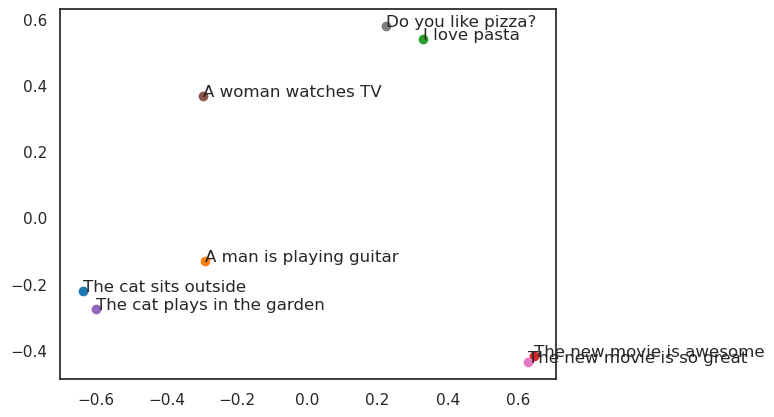

In [17]:
for coord, sentence in zip(embeddings_reduced, sentences):

    plt.scatter(coord[0], coord[1])
    plt.annotate(sentence, (coord[0], coord[1]))

## Use Case of SBERT Embeddings - Perfume Recommendation


In this section, we will apply SBERT on a [perfume dataset](https://www.kaggle.com/datasets/nandini1999/perfume-recommendation-dataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01) from Kaggle that contains the descriptions and notes of more than 2000 different types of perfumes. Since the notes of the perfumes are presented in natural language, SBERT will help us translate that into sentence embeddings which can be numerically manipulated.


### Preparing the Dataset


Let's download the perfume dataset.


In [5]:
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX068IEN/data/perfume_data.tgz", overwrite=True)

  0%|          | 0/2 [00:00<?, ?it/s]

Saved to '.'


In [6]:
df = pd.read_csv("./perfume_data.csv", encoding="unicode_escape")
df.head()

,ï»¿Name,Brand,Description,Notes,Image URL
0,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...
1,Almost Transparent Blue Eau de Toilette,A Lab on Fire,Almost Transparent Blue takes the classic ele...,"Lime, yuzu, thyme flower, aldehyde, hinoki, c...",https://static.luckyscent.com/images/products/...
2,And The World Is Yours Extrait de Parfum,A Lab on Fire,Few photographs capture the sumptuousness of ...,"Neroli, cumin, orange blossom absolute, rose,...",https://static.luckyscent.com/images/products/...
3,California Snow Eau de Parfum,A Lab on Fire,California Snow crackles with the electricity...,"Sage, tea, chamomile, coumarin, narcissus, ro...",https://static.luckyscent.com/images/products/...
4,Freckled and Beautiful Eau de Parfum,A Lab on Fire,There's no beauty quite like being young in t...,"Orange flower, neroli, honeysuckle, warm milk...",https://static.luckyscent.com/images/products/...


Let's examine the notes of the perfumes.


In [7]:
list(df.Notes[0:10])

[' Bergamot, almond, violet, jasmine, leather, sandalwood, vanilla, tonka',
 ' Lime, yuzu, thyme flower, aldehyde, hinoki, cedar wood, musk',
 ' Neroli, cumin, orange blossom absolute, rose, heliotrope, sandalwood, vanilla pod CO2,  tonka absolute, tolu balsam',
 ' Sage, tea, chamomile, coumarin, narcissus, rose, hay, cannabis, musk, soil tincture, vetiver, cedar',
 ' Orange flower, neroli, honeysuckle, warm milk, pastry, salicylates, sandalwood, vanilla bean, heliotrope',
 ' Ambrette, bergamot, pink pepper, violet, orris, iriseine, suede, blonde woods, musks',
 ' Juniper, mastic, black pepper, sea salt, clary sage, orris root, olibanum, solar accord, ambergris, vetiver, mineral musks, wet woods, ambrox, sea moss',
 ' Bergamot, lime, saffron, sage, lavender, Hinoki wood, incense, vanilla, musk',
 ' Safran, magnolia petals, Italian mandarin, jasmine sambac, tuberose, orange flower, cereal accord, orris, natural vanilla bean.',
 ' Bergamot, peach blossom, rose, heliotrope, musk, toffee, 

We want the text embeddings to be generated based on the **Notes** column. Thus, we remove redundant columns and organize the data frame.


In [8]:
df.rename(columns={"ï»¿Name": "Name"}, inplace=True)
df['Name'] = df['Brand'] + " - " + df['Name']
df.drop(labels=['Description', 'Image URL', 'Brand'], axis=1, inplace=True)
df.head()

,Name,Notes
0,A Lab on Fire - A Blvd. Called Sunset Eau de P...,"Bergamot, almond, violet, jasmine, leather, s..."
1,A Lab on Fire - Almost Transparent Blue Eau de...,"Lime, yuzu, thyme flower, aldehyde, hinoki, c..."
2,A Lab on Fire - And The World Is Yours Extrait...,"Neroli, cumin, orange blossom absolute, rose,..."
3,A Lab on Fire - California Snow Eau de Parfum,"Sage, tea, chamomile, coumarin, narcissus, ro..."
4,A Lab on Fire - Freckled and Beautiful Eau de ...,"Orange flower, neroli, honeysuckle, warm milk..."


Check for missing values.


In [9]:
df.Notes.isnull().sum()

79

Drop the rows with missing values and reset the indices.


In [10]:
df.dropna(inplace = True)
df.reset_index(inplace=True, drop = True)
df.shape

(2097, 2)

We also want to drop other types of fragrances that are not perfumes (e.g. perfume oil, extract, travel spray, hair products, body spray, etc) but might have identical names and similar notes with the perfumes in the dataset.


In [11]:
words = ["Perfume Oil", "Extrait", "Travel", "Hair", "Body", "Hand", "Intense", "Intensivo", "Oil"] # check for these words in perfume names

index_to_drop = []
for index, name in enumerate(df.Name):
    if any(word.lower() in name.lower() for word in words):
        index_to_drop.append(index)

After the preprocessing, we now have 1604 perfumes in the data frame.


In [12]:
df.drop(index_to_drop, axis=0, inplace=True)
df.reset_index(inplace=True, drop = True)
df.shape

(1604, 2)

### Creating Perfume Notes Embeddings


Let's start by putting the 1604 perfume notes into a list.


In [13]:
df.Notes = df.Notes.apply(lambda x: str(x))
notes = df.Notes.to_list()
len(notes)

1604

We use the `all-MiniLM-L6-v2` pre-trained SBERT model to generate the sentence embeddings of the perfume notes.


In [14]:
model = SentenceTransformer('all-MiniLM-L6-v2')

note_embeddings = model.encode(notes, show_progress_bar=True, batch_size=64)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

We check that each generated note embedding has length 384.


In [15]:
print(note_embeddings.shape)

print(note_embeddings[0][:50]) # first 50 values in the embedding of "Vanilla bean, musks"

(1604, 384)
[-0.00536172 -0.08962227  0.03425576  0.07611441  0.04399082  0.09172305
  0.03116251 -0.05357346  0.01305527 -0.03158853  0.08101199 -0.05667504
 -0.027444   -0.07322732  0.03848423  0.05993796  0.11013887  0.0256933
 -0.03124174  0.00807241  0.01832664 -0.00012893  0.00550093  0.02377412
  0.01978638  0.02632321  0.02199204 -0.00831317  0.00776818 -0.1247071
  0.03724482 -0.00188028  0.06668036  0.01159845 -0.0561904   0.0182688
 -0.070104   -0.11917053  0.0631799   0.06150823 -0.01092714  0.00840747
 -0.00403326 -0.02480974 -0.01124481 -0.0303256   0.03361209  0.00046363
 -0.00190012  0.0766108 ]


### Recommending Perfumes using Cosine Similarity


We calculate the cosine similarity scores for all the pairs of perfume note embeddings.


In [22]:
cosine_scores = util.cos_sim(note_embeddings, note_embeddings)
cosine_scores.shape

torch.Size([1604, 1604])

Sorting the scores in descending order and appending the (index, score) pair to `pairs`.


In [23]:
pairs = []

for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({"index": [i,j], "score": cosine_scores[i][j]})

len(pairs)

1285606

As we have more than 1000 perfumes in the dataset, the number of unique pairs of note embeddings is more than 1M. Next, we sort the pairs based on their corresponding similarity scores, and we print out 10 pairs with the highest scores as the most similar perfumes in the dataset.


In [24]:
sorted_pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in sorted_pairs[0:10]:
    i, j = pair['index']
    print(f"{df.iloc[i, 0]} | {df.iloc[j, 0]} \n Score: {pair['score']:.2f} \n")

Comme des Garcons - 2 Eau de Parfum | Comme des Garcons - 2 Candle 
 Score: 1.00 

Roja Parfums - Elysium Parfum Cologne | Roja Parfums - Vetiver Parfum Cologne 
 Score: 1.00 

Ormonde Jayne - Ormonde Elixir Parfum | Ormonde Jayne - Ormonde Woman Eau de Parfum 
 Score: 0.98 

PARFUMS DE NICOLAI - Incense Oud Eau de Parfum | PARFUMS DE NICOLAI - Oud Sublime Elixir de Parfum 
 Score: 0.97 

J-Scent - Hisui (Jade) Eau de Parfum | J-Scent - Shaft of Light Eau de Parfum 
 Score: 0.95 

Roja Parfums - Danger Parfum Cologne | Roja Parfums - Scandal Parfum Cologne 
 Score: 0.94 

Xerjoff - Oud Stars - Alexandria II Eau de Parfum | Xerjoff - Oud Stars - Alexandria III Parfum 
 Score: 0.94 

Charenton Macerations - Asphalt Rainbow Eau de Parfum | Charenton Macerations - Asphalt Rainbow Scratch & Sniff Sticker Set 
 Score: 0.94 

Ormonde Jayne - Ambre Royal Eau de Parfum | Ormonde Jayne - Royal Elixir Parfum 
 Score: 0.94 

Les Bains Guerbois - 2015 Le Phenix Eau de Parfum | Les Bains Guerbois - 

## Exercise: Getting Your Own Perfume Suggestions


Do you want to get recommendations for the perfume(s) you like or own? Add their names and notes (you can search it up [here](https://www.fragrantica.com/notes/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01)) to the `my_perfumes` dataframe!


In [16]:
my_perfumes = pd.DataFrame([['Jo Malone - English Pear & Freesia', 'Pear, Melon, Freesia, Rose, Musk, Patchouli, Rhuburb, Amber'], 
                      ['Jo Malone - Myrrh & Tonka', 'Lavender, Myrrh, Tonka Bean, Vanilla, Almond'],
                      ['Jo Malone - Oud & Bergamot', 'orange, bergamot, lemon, cedar and oud.'],
                      ['Guerlain - Néroli Outrenoir', 'Petitgrain, Bergamot, Tangerine, Lemon, Grapefruit, Tea, Neroli, Orange Blossom, Smoke, Earthy Notes, Myrrh, Vanilla, Benzoin, Ambrette, Oakmoss.'],
                      ['Guerlain - Épices Volées', 'Coriander, Lemon, Artemisia, Bergamot, Clove, Cardamom, Sage, Bulgarian Rose, Sandalwood, Patchouli, Benzoin, Labdanum.'],
                      ['Guerlain - Aqua Allegoria Nerolia Vetiver Eau de Toilette', 'Basil, Vetiver, Fig Accord, Neroli'],
                      ['Chloe Eau de Parfum', 'Peony, Litchi, Freesia, Rose, Lily-of-the-Valley, Magnolia, Virginia Cedar, Amber.']                     
                     ],
                   columns=df.columns)

my_perfumes

,Name,Notes
0,Jo Malone - English Pear & Freesia,"Pear, Melon, Freesia, Rose, Musk, Patchouli, R..."
1,Jo Malone - Myrrh & Tonka,"Lavender, Myrrh, Tonka Bean, Vanilla, Almond"
2,Jo Malone - Oud & Bergamot,"orange, bergamot, lemon, cedar and oud."
3,Guerlain - Néroli Outrenoir,"Petitgrain, Bergamot, Tangerine, Lemon, Grapef..."
4,Guerlain - Épices Volées,"Coriander, Lemon, Artemisia, Bergamot, Clove, ..."
5,Guerlain - Aqua Allegoria Nerolia Vetiver Eau ...,"Basil, Vetiver, Fig Accord, Neroli"
6,Chloe Eau de Parfum,"Peony, Litchi, Freesia, Rose, Lily-of-the-Vall..."


### Exercise 1: Create perfume embeddings

Create perfume embeddings for `my_perfumes` using the `all-MiniLM-L6-v2` model from `sentence-transformer`. Call it `my_embeddings`.


In [17]:
# your code here
notes = list(my_perfumes.Notes)
model = SentenceTransformer('all-MiniLM-L6-v2')
my_embeddings = model.encode(notes,show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<details><summary>Click Here for Solution</summary>
    
```python

notes = list(my_perfumes.Notes)

model = SentenceTransformer('all-MiniLM-L6-v2')
my_embeddings = model.encode(notes, show_progress_bar=True)
```
</details>


### Exercise 2: Produce cosine similarity scores

Calculate cosine similarity scores between `my_perfumes` and the other 1604 perfumes, i.e: a similarity matrix between `my_embeddings` and `note_embeddings`.


In [18]:
# your code here
cosine_scores = util.cos_sim(my_embeddings, note_embeddings)

<details><summary>Click Here for Solution</summary>
    
```python

cosine_scores = util.cos_sim(my_embeddings, note_embeddings)
```
</details>


### Exercise 3: Sort the perfume similarity scores

Create a list of (index, score) key-value pairs called `my_pairs` and sort `my_pairs` in descending order. Name the sorted list `my_sorted_pairs`.


In [19]:
# your code here
my_pairs = []

for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        my_pairs.append({"index": [i,j], "score": cosine_scores[i][j]})
        
my_sorted_pairs = sorted(my_pairs, key=lambda x: x['score'], reverse=True)  

<details><summary>Click Here for Solution</summary>
    
```python

my_pairs=[]

for i in range(cosine_scores.shape[0]):
    for j in range(cosine_score.shape[1]):
        my_pairs.append({"index": [i,j], "score": cosine_scores[i][j]})
        
        
my_sorted_pairs = sorted(my_pairs, key=lambda x: x['score'], reverse=True)
```
</details>


For each of the perfume in `my_perfumes`, let's display the first 5 out of the 1604 perfumes that are most likely to be recommended.


In [20]:
for i in range(cosine_scores.shape[0]):

    print(f"Recommended for {my_perfumes.iloc[i, 0]}:")
        
    for no, pair in enumerate(my_sorted_pairs[:5]):
        print(f" {no+1}. {df.iloc[pair['index'], 0]} (Score: {pair['score']:.2f})")
    print("\n")

Recommended for Jo Malone - English Pear & Freesia:
 1. 1    A Lab on Fire - California Snow Eau de Parfum
5        A Lab on Fire - LiquidNight Eau de Parfum
Name: Name, dtype: object (Score: 0.72)
 2. 1        A Lab on Fire - California Snow Eau de Parfum
2    A Lab on Fire - Freckled and Beautiful Eau de ...
Name: Name, dtype: object (Score: 0.71)
 3. 4       A Lab on Fire - Hossegor Eau de Parfum
5    A Lab on Fire - LiquidNight Eau de Parfum
Name: Name, dtype: object (Score: 0.70)
 4. 3    A Lab on Fire - Hallucinogenic Pearl Eau de Pa...
5            A Lab on Fire - LiquidNight Eau de Parfum
Name: Name, dtype: object (Score: 0.69)
 5. 0    A Lab on Fire - A Blvd. Called Sunset Eau de P...
2    A Lab on Fire - Freckled and Beautiful Eau de ...
Name: Name, dtype: object (Score: 0.66)


Recommended for Jo Malone - Myrrh & Tonka:
 1. 1    A Lab on Fire - California Snow Eau de Parfum
5        A Lab on Fire - LiquidNight Eau de Parfum
Name: Name, dtype: object (Score: 0.72)
 2. 1      

## Background on BERT (optional)


### What is BERT?

BERT, or **Bidirectional Encoder Representations from Transformers**, is a language representation model designed by researchers at Goodle AI Language.


### What does BERT do?

- Unlike other pre-trained models prior to BERT, such as the feature-based model [ELMo](https://arxiv.org/abs/1802.05365?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01) and the fine-tuning model [GPT](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01) that perform unidirectional language representation learning, BERT pre-trains deep **bidirectional** representations from unlabeled text **by jointly conditioning on both left and right context in all layers**. 

- BERT is the first fine-tuning based representation model that achieves state-of-the-art performance on a large suite of **sentence-level tasks** such as paraphrasing and **token-level tasks** such as Named Entity Recognition **(NER)**, outperforming many task specific architectures.

- BERT advances the state of the art for 11 NLP tasks. The code and pre-trained models are available at https://github.com/google-research/bert.


<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX068IEN/images/comparison.png" width="70%"><center>
    
<p style="color:gray; text-align:center;">Image credits to <a href="https://arxiv.org/abs/1810.04805?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01">Devlin et al.</a></p>


### How does BERT work?

There are 2 steps in BERT framework: **pre-training** and **fine-tuning**. <p style="color:blue">BERT is pre-trained on unlabeled data over two unsupervised tasks.</p>

 1. **Masked LM**: Before the sentences are fed into BERT, 15% of the input tokens in each sentence are masked at random with a `[MASK]` token. The model then predicts those masked tokens based on the left-to-right and right-to-left context provided by the other non-masked tokens in the sentence. This allows us to obtain a bidirectional pre-trained model.
 
 2. **Next Sentence Prediction**: During the BERT training process, the model would receive pairs of sentences as input. When choosing the sentences A and B for each training example, 50% of the time B is the actual next sentence of A in the original document and 50% of the time B is a random sentence from the corpus. The model learns to predict whether B is the actual next sentence of A. This alows us to obtain a model that understands the relationship between two sentences. 

Putting it all together, during the training of the BERT model, Masked LM and Next Sentence prediction are trained together with the goal of minimizing the losses of both strategies.


<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX068IEN/images/BERT_input.png" width="75%"><center>
    
<p style="color:gray; text-align:center;">Image credits to <a href="https://arxiv.org/abs/1810.04805?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01">Devlin et al.</a></p>


<p style="color:blue">BERT is fine-tuned using labeled data from the downstream tasks.</p> 

The self-attention mechanism in the Transformer allows BERT to model many downstream tasks, either involving single text or text pairs. For tasks involving text pairs such as paraphrasing, the **task-specific** sentence pairs mentioned previously, sentence A and sentence B would be fed into BERT as the input for fine-tuning. At the output, the token representations can be passed through an output layer for token-level tasks such as Name Entity Recognition.


## Congratulations on completing this guided project!


## Authors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01) is a Data Scientist at IBM with extensive theoretical/academic, research, and work experience in different areas of Machine Learning, including Classification, Clustering, Computer Vision, NLP, and Generative AI.


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2022-11-23|0.1|Roxanne Li|Create guided project|


Copyright © 2022 IBM Corporation. All rights reserved.
